
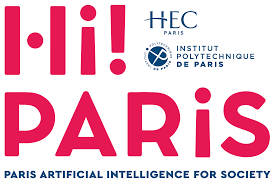

___

* <b>Aluna Wang - Assistant Professor - HEC Paris</b>
* <b>Tong Wang - Associate Professor - University of Edinburgh</b>
* <b>Gaëtan Brison - ML Research Engineer - Institut Polytechnique de Paris</b>
* <b>Awais Sani - ML Research Engineer - Télécom Paris</b>
___

## Private Companies Repositories

### Import Packages

In [1]:
import os
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from typing import List, Any
from datetime import datetime
from urllib.request import Request, urlopen
import time
import json
pd.set_option('display.max_rows', 500)

### Look at Repositories

In [2]:
dic_companies = {
    "IBM":{"Github":"https://github.com/IBM","Repositories":2500, "People":3100},
    "Microsoft":{"Github":"https://github.com/microsoft","Repositories":4800,"People":4400},
    "Google":{"Github":"https://github.com/google","Repositories":2200,"People":779},
    "Intel":{"Github":"https://github.com/intel","Repositories":865,"People":50},
    "Amazon.com":{"Github":"https://github.com/aws","Repositories":329,"People":182},
    "SAP":{"Github":"https://github.com/SAP","Repositories":232,"People":451},
    "ThoughtWorks":{"Github":"https://github.com/thoughtworks","Repositories":58,"People":49},
    "Alibaba":{"Github":"https://github.com/alibaba","Repositories":432,"People":152},
    "GitHub":{"Github":"https://github.com/github","Repositories":410,"People":262},
    "Facebook":{"Github":"https://github.com/facebookresearch","Repositories":614,"People":36},
    "Tencent":{"Github":"https://github.com/Tencent","Repositories":163,"People":7},
    "EPAM Systems":{"Github":"https://github.com/epam","Repositories":200,"People":30},
    "Baidu":{"Github":"https://github.com/baidu","Repositories":105,"People":58},
    "Mozilla":{"Github":"https://github.com/mozilla/","Repositories":2300,"People":221},
    "Oracle":{"Github":"https://github.com/oracle","Repositories":269,"People":1100},
    "Unity Technologies":{"Github":"https://github.com/Unity-Technologies","Repositories":659,"People":71},
    "Uber":{"Github":"https://github.com/uber","Repositories":135,"People":66},
    "Yandex":{"Github":"https://github.com/yandex","Repositories":101,"People":48},
    "Shopify":{"Github":"https://github.com/Shopify","Repositories":832,"People":240},
    "LinkedIn":{"Github":"https://github.com/linkedin","Repositories":105,"People":51},
    "Suse":{"Github":"https://github.com/SUSE","Repositories":365,"People":123},
    "ESRI":{"Github":"https://github.com/Esri","Repositories":630,"People":105},
    "Apple":{"Github":"https://github.com/apple","Repositories":156,"People":108},
    "Salesforce.com":{"Github":"https://github.com/salesforce","Repositories":314,"People":31},
    "VMware":{"Github":"https://github.com/vmware","Repositories":200,"People":202},
    "Adobe Systems":{"Github":"https://github.com/adobe","Repositories":740,"People":195},
    "Andela":{"Github":"https://github.com/andela","Repositories":728,"People":14},
    "Cisco Systems":{"Github":"https://github.com/cisco","Repositories":80,"People":30},
    "Huggingface":{"Github":"https://github.com/huggingface","Repositories":78,"People":49},
}

In [3]:
df_companies = pd.DataFrame.from_dict(dic_companies, orient='index')

In [4]:
df_companies['Companies'] = df_companies.index
df_companies = df_companies.reset_index(level=0)

In [5]:
df_companies = df_companies[["Github","Repositories","People","Companies"]]

In [6]:
df_companies.head(3)

,Github,Repositories,People,Companies
0,https://github.com/IBM,2500,3100,IBM
1,https://github.com/microsoft,4800,4400,Microsoft
2,https://github.com/google,2200,779,Google


### Python Repositories by order of Stars

Example: https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers

In [7]:
### Step I - Collect all 

In [8]:
len(dic_companies)

29

In [18]:
type(df_companies["Github"])

pandas.core.series.Series

In [22]:
def generate_url_top_repository_python(df,col_name_url_repo):
    list_url_rep = []
    for i in range(0,len(df[col_name_url_repo])):
        list_url_rep.append("https://github.com/orgs/"+df[col_name_url_repo][i].split("/")[3]+"/repositories?q=&type=all&language=python&sort=stargazers")
    return list_url_rep

In [23]:
df_companies["Python Repositories Github"] = generate_url_top_repository_python(df_companies,"Github")

In [24]:
display(df_companies.head(3))
display(df_companies.shape)

,Github,Repositories,People,Companies,Python Repositories Github,Number of Pages
0,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16
1,https://github.com/microsoft,4800,4400,Microsoft,https://github.com/orgs/microsoft/repositories...,21
2,https://github.com/google,2200,779,Google,https://github.com/orgs/google/repositories?q=...,16


(29, 6)

In [25]:
def get_page_number_repository(df,col_url):
    list_number_pages = []
    for j in range(0,len(df[col_url])):
        url = df[col_url][j]
        print(url)
        req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
        webpage = webpage.decode('utf-8')
        soup = BeautifulSoup(webpage, 'html.parser')
        list_tag_a = soup.findAll("a",href=True)
        list_page = [ i for i in list_tag_a if "Page" in str(i)]
        if len(list_page) > 1:
            number_of_pages = int(str(list_page[-1]).split("""type=all">""")[1].split('</a>')[0])
            list_number_pages.append(number_of_pages)
        elif len(list_page) == 1:
            number_of_pages = int(str(list_page[-1]).split("""rel="next">""")[1].split('</a>')[0])
            list_number_pages.append(number_of_pages)        
        else:
            list_number_pages.append(1)
    return list_number_pages

In [26]:
df_companies["Number of Pages"] = get_page_number_repository(df_companies,"Python Repositories Github")

https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers
https://github.com/orgs/microsoft/repositories?q=&type=all&language=python&sort=stargazers
https://github.com/orgs/google/repositories?q=&type=all&language=python&sort=stargazers
https://github.com/orgs/intel/repositories?q=&type=all&language=python&sort=stargazers
https://github.com/orgs/aws/repositories?q=&type=all&language=python&sort=stargazers
https://github.com/orgs/SAP/repositories?q=&type=all&language=python&sort=stargazers
https://github.com/orgs/thoughtworks/repositories?q=&type=all&language=python&sort=stargazers
https://github.com/orgs/alibaba/repositories?q=&type=all&language=python&sort=stargazers
https://github.com/orgs/github/repositories?q=&type=all&language=python&sort=stargazers
https://github.com/orgs/facebookresearch/repositories?q=&type=all&language=python&sort=stargazers
https://github.com/orgs/Tencent/repositories?q=&type=all&language=python&sort=stargazers
https://github.com/or

In [27]:
display(df_companies.head(3))
display(df_companies.shape)

,Github,Repositories,People,Companies,Python Repositories Github,Number of Pages
0,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16
1,https://github.com/microsoft,4800,4400,Microsoft,https://github.com/orgs/microsoft/repositories...,21
2,https://github.com/google,2200,779,Google,https://github.com/orgs/google/repositories?q=...,16


(29, 6)

In [28]:
df_companies_2 = df_companies.reindex(df_companies.index.repeat(df_companies["Number of Pages"])).reset_index(drop=True)

In [28]:
list_master_page = []
for i in range(0,len(df_companies["Number of Pages"])):
    list_master_page = list_master_page + list(range(0+1,df_companies["Number of Pages"][i]+1))
    

In [29]:
len(list_master_page)

131

In [30]:
df_companies_2["Page Number Github"] = list_master_page

In [31]:
df_companies_2.head(10)

,Github,Repositories,People,Companies,Python Repositories Github,Number of Pages,Page Number Github
0,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1
1,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,2
2,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,3
3,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,4
4,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,5
5,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,6
6,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,7
7,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,8
8,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,9
9,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,10


In [32]:
list_master_page_url = []
for i in range(0,len(df_companies_2["Number of Pages"])):
    list_master_page_url.append(df_companies_2["Python Repositories Github"][i] +f"&page={df_companies_2['Page Number Github'][i]}")

In [33]:
df_companies_2["Page Number Github Url"] = list_master_page_url

In [34]:
df_companies_2.head(3)

,Github,Repositories,People,Companies,Python Repositories Github,Number of Pages,Page Number Github,Page Number Github Url
0,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...
1,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,2,https://github.com/orgs/IBM/repositories?q=&ty...
2,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,3,https://github.com/orgs/IBM/repositories?q=&ty...


In [35]:
df_companies_2["Page Number Github Url"][0]

'https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers&page=1'

In [37]:
def list_repositories_of_company_per_page(df, col_page_url)
    list_master_repositories = []
    for l in range(0,len(df_companies_2["Page Number Github Url"])):
        time.sleep(2)
        list_tag_final = []
        url = df_companies_2["Page Number Github Url"][l]
        print(url)
        req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
        webpage = webpage.decode('utf-8')
        soup = BeautifulSoup(webpage, 'html.parser')
        list_tag_a = soup.findAll("a",href=True)
        list_tag_final.append(list_tag_a)

        # Name Packages
        list_package_name = []
        for j in range(0,len(list_tag_final)):
            list_repo = [i for i in list_tag_final[j] if 'name codeRepository' in str(i)] 
            list_package_name_2 = []
            for i in range(0,len(list_repo)):
                list_package_name_2.append(str(list_repo[i]).split(f"/{df_companies_2['Page Number Github Url'][l].split('/')[4]}/")[1].split("/")[0])
            list_package_name += list_package_name_2
            len(list_package_name)
        list_master_repositories.append(list_package_name)
    return list_master_repositories

https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers&page=1
https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers&page=2
https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers&page=3
https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers&page=4
https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers&page=5
https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers&page=6
https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers&page=7
https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers&page=8
https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers&page=9
https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=stargazers&page=10
https://github.com/orgs/IBM/repositories?q=&type=all&language=python&sort=starg

In [38]:
df_companies_2["List Repositories per Page"] = list_repositories_of_company_per_page(df_companies_2,"Page Number Github Url")

In [40]:
df_companies_3 = df_companies_2.copy()

In [41]:
number_of_package_per_page = []
for i in range(0,len(df_companies_3["List Repositories per Page"])):
    number_of_package_per_page.append(len(df_companies_3["List Repositories per Page"][i]))
    

In [42]:
df_companies_3["Number of Repositories per Page"] = number_of_package_per_page

In [43]:
df_companies_3.head(10)

,Github,Repositories,People,Companies,Python Repositories Github,Number of Pages,Page Number Github,Page Number Github Url,List Repositories per Page,Number of Repositories per Page
0,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"[pytorch-seq2seq, Project_CodeNet, MicroscoPy,...",30
1,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,2,https://github.com/orgs/IBM/repositories?q=&ty...,"[matrix-capsules-with-em-routing, transition-a...",30
2,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,3,https://github.com/orgs/IBM/repositories?q=&ty...,"[ny-power, discrete-gaussian-differential-priv...",30
3,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,4,https://github.com/orgs/IBM/repositories?q=&ty...,"[sifar-pytorch, MAX-Framework, Semantic-Search...",30
4,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,5,https://github.com/orgs/IBM/repositories?q=&ty...,"[jsonsubschema, covid19-india-data, MAX-Skelet...",30
5,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,6,https://github.com/orgs/IBM/repositories?q=&ty...,"[RegionViT, photorealistic-blocksworld, pytorc...",30
6,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,7,https://github.com/orgs/IBM/repositories?q=&ty...,"[QMO, max-tutorial-app-python, Environmental-I...",30
7,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,8,https://github.com/orgs/IBM/repositories?q=&ty...,"[pycloudmessenger, containerization-for-sap-s4...",30
8,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,9,https://github.com/orgs/IBM/repositories?q=&ty...,"[regression-transformer, kg-goal-oriented-dial...",30
9,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,10,https://github.com/orgs/IBM/repositories?q=&ty...,"[tnz, automation-of-image-data-preprocessing, ...",30


In [44]:
df_companies_4 = df_companies_3.reindex(df_companies_3.index.repeat(df_companies_3["Number of Repositories per Page"])).reset_index(drop=True)

In [45]:
display(df_companies_4.head(5))
display(df_companies_4.shape)

,Github,Repositories,People,Companies,Python Repositories Github,Number of Pages,Page Number Github,Page Number Github Url,List Repositories per Page,Number of Repositories per Page
0,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"[pytorch-seq2seq, Project_CodeNet, MicroscoPy,...",30
1,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"[pytorch-seq2seq, Project_CodeNet, MicroscoPy,...",30
2,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"[pytorch-seq2seq, Project_CodeNet, MicroscoPy,...",30
3,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"[pytorch-seq2seq, Project_CodeNet, MicroscoPy,...",30
4,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"[pytorch-seq2seq, Project_CodeNet, MicroscoPy,...",30


(3527, 10)

In [46]:
list_of_list_package = list(df_companies_3["List Repositories per Page"])
flat_list = [item for sublist in list_of_list_package for item in sublist]

In [8]:
df_companies_4 = df_companies.copy()

In [11]:
df_companies_4["Packages"] = [i.split("github.com/")[1].split("/")[1] for i in list(df_companies_4["Github"])]
df_companies_4["Owner"] = [i.split("github.com/")[1].split("/")[0] for i in list(df_companies_4["Github"])]

In [12]:
df_companies_4.head(3)

,Github,Python Repositories Github,Packages,Owner
0,https://github.com/keras-team/keras,https://github.com/orgs/keras-team/repositorie...,keras,keras-team
1,https://github.com/ageitgey/face_recognition,https://github.com/orgs/ageitgey/repositories?...,face_recognition,ageitgey
2,https://github.com/localstack/localstack,https://github.com/orgs/localstack/repositorie...,localstack,localstack


In [47]:
df_companies_4["Packages"] = flat_list

In [72]:
df_companies_4

,Github,Repositories,People,Companies,Python Repositories Github,Number of Pages,Page Number Github,Page Number Github Url,List Repositories per Page,Number of Repositories per Page,Packages
0,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"[pytorch-seq2seq, Project_CodeNet, MicroscoPy,...",30,pytorch-seq2seq
1,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"[pytorch-seq2seq, Project_CodeNet, MicroscoPy,...",30,Project_CodeNet
2,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"[pytorch-seq2seq, Project_CodeNet, MicroscoPy,...",30,MicroscoPy
3,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"[pytorch-seq2seq, Project_CodeNet, MicroscoPy,...",30,MAX-Image-Resolution-Enhancer
4,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"[pytorch-seq2seq, Project_CodeNet, MicroscoPy,...",30,differential-privacy-library
...,...,...,...,...,...,...,...,...,...,...,...
3522,https://github.com/huggingface,78,49,Huggingface,https://github.com/orgs/huggingface/repositori...,2,2,https://github.com/orgs/huggingface/repositori...,"[awd-lstm-lm, optimum-habana, api-inference-co...",13,stable-baselines3
3523,https://github.com/huggingface,78,49,Huggingface,https://github.com/orgs/huggingface/repositori...,2,2,https://github.com/orgs/huggingface/repositori...,"[awd-lstm-lm, optimum-habana, api-inference-co...",13,neural-compressor
3524,https://github.com/huggingface,78,49,Huggingface,https://github.com/orgs/huggingface/repositori...,2,2,https://github.com/orgs/huggingface/repositori...,"[awd-lstm-lm, optimum-habana, api-inference-co...",13,huggingface-sagemaker-snowflake-example
3525,https://github.com/huggingface,78,49,Huggingface,https://github.com/orgs/huggingface/repositori...,2,2,https://github.com/orgs/huggingface/repositori...,"[awd-lstm-lm, optimum-habana, api-inference-co...",13,flax_bert


In [56]:
df_companies_2["Page Number Github"].value_counts()

1     29
2     17
3      9
4      8
5      6
6      6
9      5
7      5
8      5
10     5
11     5
12     5
13     5
14     5
15     5
16     4
19     2
17     2
18     2
20     1
Name: Page Number Github, dtype: int64

In [49]:
df_companies_4.to_csv("df_companies_4.csv",index=False)
df_companies_4.to_excel("df_companies_4.xlsx",index=False)

In [4]:
df_companies_4= pd.read_csv("df_companies_4.csv")

In [5]:
display(df_companies_4.head(3))
display(df_companies_4.shape)

,Github,Repositories,People,Companies,Python Repositories Github,Number of Pages,Page Number Github,Page Number Github Url,List Repositories per Page,Number of Repositories per Page,Packages
0,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"['pytorch-seq2seq', 'Project_CodeNet', 'Micros...",30,pytorch-seq2seq
1,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"['pytorch-seq2seq', 'Project_CodeNet', 'Micros...",30,Project_CodeNet
2,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"['pytorch-seq2seq', 'Project_CodeNet', 'Micros...",30,MicroscoPy


(3527, 11)

In [8]:
df_companies_5 = df_companies_4[df_companies_4["Page Number Github"] <= 3].reset_index(drop = True)

In [9]:
display(df_companies_5.head(3))
display(df_companies_5.shape)

,Github,Repositories,People,Companies,Python Repositories Github,Number of Pages,Page Number Github,Page Number Github Url,List Repositories per Page,Number of Repositories per Page,Packages
0,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"['pytorch-seq2seq', 'Project_CodeNet', 'Micros...",30,pytorch-seq2seq
1,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"['pytorch-seq2seq', 'Project_CodeNet', 'Micros...",30,Project_CodeNet
2,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"['pytorch-seq2seq', 'Project_CodeNet', 'Micros...",30,MicroscoPy


(1359, 11)

In [18]:
df_companies_4.head(3)

,Github,Python Repositories Github,Packages,Owner,Url Repositories
0,https://github.com/keras-team,https://github.com/orgs/keras-team/repositorie...,keras,keras-team,https://github.com/keras-team/keras
1,https://github.com/ageitgey,https://github.com/orgs/ageitgey/repositories?...,face_recognition,ageitgey,https://github.com/ageitgey/face_recognition
2,https://github.com/localstack,https://github.com/orgs/localstack/repositorie...,localstack,localstack,https://github.com/localstack/localstack


In [14]:
df_companies_4["Url Repositories"] = df_companies_4["Github"]

In [17]:
df_companies_4["Github"] = [ "https://github.com/"+i for i in list(df_companies_4["Owner"])]

In [10]:
df_companies_5["Url Repositories"] = df_companies_5["Github"]+"/"+df_companies_5["Packages"]

In [11]:
df_companies_5.head(3)

,Github,Repositories,People,Companies,Python Repositories Github,Number of Pages,Page Number Github,Page Number Github Url,List Repositories per Page,Number of Repositories per Page,Packages,Url Repositories
0,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"['pytorch-seq2seq', 'Project_CodeNet', 'Micros...",30,pytorch-seq2seq,https://github.com/IBM/pytorch-seq2seq
1,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"['pytorch-seq2seq', 'Project_CodeNet', 'Micros...",30,Project_CodeNet,https://github.com/IBM/Project_CodeNet
2,https://github.com/IBM,2500,3100,IBM,https://github.com/orgs/IBM/repositories?q=&ty...,16,1,https://github.com/orgs/IBM/repositories?q=&ty...,"['pytorch-seq2seq', 'Project_CodeNet', 'Micros...",30,MicroscoPy,https://github.com/IBM/MicroscoPy


In [19]:
df_companies_5 = df_companies_4.copy()

In [6]:
list_package_name = list(df_companies_5["Url Repositories"])

In [58]:
len(list_package_name)

1309

In [32]:
df_companies_5.to_excel("df_v2.xlsx",index=False)

In [4]:
df_companies_5 = pd.read_excel("df_v2.xlsx")

In [46]:
df_companies_5.head(3)

,Github,Python Repositories Github,Packages,Owner,Url Repositories
0,https://github.com/keras-team,https://github.com/orgs/keras-team/repositorie...,keras,keras-team,https://github.com/keras-team/keras
1,https://github.com/ageitgey,https://github.com/orgs/ageitgey/repositories?...,face_recognition,ageitgey,https://github.com/ageitgey/face_recognition
2,https://github.com/localstack,https://github.com/orgs/localstack/repositorie...,localstack,localstack,https://github.com/localstack/localstack


In [12]:
def fetch_repositories_attributes(list_url_repositories):
    list_language_master = []
    list_percentage_master = []
    list_ultimate_contributor = []
    list_issue = []
    list_star = []
    list_fork = []
    list_license = []
    list_last_update = []
    list_commits = []
    list_pull = []

    for name in list_url_repositories: 
        print(name)
        section = f"{name}"
        req = Request(section, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
        webpage = webpage.decode('utf-8')
        soup = BeautifulSoup(webpage, 'html.parser')
        #Issue
        list_tag_issue = soup.findAll("span",{"id":"issues-repo-tab-count"},{"class":"Counter"})
        if len(list_tag_issue) >= 1:
            issue_value = list_tag_issue[0].get_text()
            list_issue.append(issue_value)
        else:
            list_issue.append("Issue Missing")

        #Star
        list_tag_star = soup.findAll("span",{"id":"repo-stars-counter-star"},{"class":"Counter"})
        if len(list_tag_star) >= 1:
            star_value = list_tag_star[0].get_text()
            list_star.append(star_value)
        else:
            list_star.append("Star Missing")

        #Fork
        list_tag_fork = soup.findAll("span",{"id":"repo-network-counter"},{"class":"Counter"})
        if len(list_tag_fork) >= 1:
            fork_value = list_tag_fork[0].get_text()
            list_fork.append(fork_value)
        else:
            list_fork.append("Fork Missing")    

        #Pull Request
        list_tag_pull = soup.findAll("span",{"id":"pull-requests-repo-tab-count"},{"class":"Counter"})
        if len(list_tag_pull) >= 1:
            pull_value = list_tag_pull[0].get_text()
            list_pull.append(pull_value)
        else:
            list_pull.append("Pull Missing")   

        #License
        list_tag_license = soup.findAll("a",{"data-analytics-event":'{"category":"Repository Overview","action":"click","label":"location:sidebar;file:license"}'})
        if len(list_tag_license) >= 1:
            list_license.append(list_tag_license[0].get_text().strip())
        else:
            list_license.append("No License")
        # Languages
        list_language = soup.findAll("span",{"class":"color-fg-default text-bold mr-1"})
        list_language_final = [i.get_text() for i in list_language]
        list_language_percentage = re.findall("\\d+(?:\\.\\d+)?%",str(soup))[-len(list_language):]
        list_language_percentage.sort(key = lambda x: float(x[:-1]), reverse=True)
        list_language_master.append(list_language_final)
        list_percentage_master.append(list_language_percentage)

        #Contributor
        list_tag_contri = soup.findAll("a",{"class":""})
        list_contributor = [j for j in list_tag_contri if 'user' in str(j)]
        string_text_contributor = ''.join(str(e) for e in list_contributor)
        lit_contributor_name = re.findall("@[\w]+", string_text_contributor)
        list_ultimate_contributor.append(lit_contributor_name)

        #Time
        list_tag_time = soup.findAll("a")
        list_tag_time_2 = [i for i in list_tag_time if "relative-time" in str(i)]
        if len(list_tag_time_2) >= 1:
            time_value= list_tag_time_2[0].get_text().strip()
            list_last_update.append(time_value)
        else:
            list_last_update.append("Missing Last Update")

        #Total Commits
        list_tag_commits = soup.findAll("span",{"class":"d-none d-sm-inline"})
        if len(list_tag_commits) >1:
            commits_value = re.findall("\\d+",list_tag_commits[1].get_text().strip())
            list_commits.append(commits_value)
        elif len(list_tag_commits) == 1:
            commits_value = re.findall("\\d+",list_tag_commits[0].get_text().strip())
            list_commits.append(commits_value)
        else:
            list_commits.append("Missing Total Commits Value")

    return list_issue, list_star, list_fork, list_pull, list_license, list_language_master, list_percentage_master, list_ultimate_contributor, list_last_update, list_commits



https://github.com/carpedm20/DCGAN-tensorflow
https://github.com/eriklindernoren/PyTorch-GAN
https://github.com/zhangqianhui/AdversarialNetsPapers
https://github.com/MorvanZhou/PyTorch-Tutorial
https://github.com/MorvanZhou/Tensorflow-Tutorial
https://github.com/nightrome/really-awesome-gan
https://github.com/trufflesuite/ganache-cli
https://github.com/makegirlsmoe/makegirlsmoe_web
https://github.com/nashory/gans-awesome-applications
https://github.com/Mikoto10032/DeepLearning
https://github.com/shaoanlu/faceswap-GAN
https://github.com/tamarott/SinGAN
https://github.com/tensorlayer/srgan
https://github.com/borisbanushev/stockpredictionai
https://github.com/trufflesuite/ganache
https://github.com/golbin/TensorFlow-Tutorials
https://github.com/znxlwm/pytorch-generative-model-collections
https://github.com/openai/improved-gan
https://github.com/jeffheaton/t81_558_deep_learning
https://github.com/igul222/improved_wgan_training
https://github.com/ajbrock/BigGAN-PyTorch
https://github.com/ro

In [ ]:
list_issue, list_star, list_fork, list_pull, list_license, list_language_master, list_percentage_master, list_ultimate_contributor, list_last_update, list_commits = fetch_repositories_attributes(list_package_name)


In [8]:
# Cleanup total commits 
for c in range(0,len(list_commits)):
    list_commits[c] = "".join(list_commits[c])

In [13]:
display(len(list_language_master))
display(len(list_percentage_master))
display(len(list_ultimate_contributor))
display(len(list_issue))
display(len(list_star))
display(len(list_fork))
display(len(list_license))
display(len(list_last_update))
display(len(list_commits))
display(len(list_pull))

1309

1309

1309

1309

1309

1309

1309

1309

1309

1309

In [14]:
#User
def fetch_repositories_user(list_url_repositories):
    list_master_user = []
    list_master_repo_using = []
    for name in list_url_repositories:
        print(name)
        list_user = []
        list_repo_using = []
        section = f"{name}"
        req = Request(section+"/network/dependents", headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
        webpage = webpage.decode('utf-8')
        soup = BeautifulSoup(webpage, 'html.parser')
        list_tag_a = soup.findAll("span",{"class":"f5 color-fg-muted"})
        for i in range(0,len(list_tag_a)):
            list_user.append(list_tag_a[i].get_text().split(" /\n      ")[0].strip())
            list_repo_using.append(list_tag_a[i].get_text().split(" /\n      ")[1].strip())
        list_master_user.append(list_user)
        list_master_repo_using.append(list_repo_using)
    return list_master_user, list_master_repo_using

https://github.com/keras-team/keras
https://github.com/ageitgey/face_recognition
https://github.com/localstack/localstack
https://github.com/Textualize/rich
https://github.com/swisskyrepo/PayloadsAllTheThings
https://github.com/commaai/openpilot
https://github.com/gto76/python-cheatsheet
https://github.com/chubin/cheat.sh
https://github.com/psf/black
https://github.com/pypa/pipenv
https://github.com/open-mmlab/mmdetection
https://github.com/python-telegram-bot/python-telegram-bot
https://github.com/chubin/wttr.in
https://github.com/luong-komorebi/Awesome-Linux-Software
https://github.com/tzutalin/labelImg
https://github.com/pytorch/fairseq
https://github.com/zulip/zulip
https://github.com/jhao104/proxy_pool
https://github.com/JaidedAI/EasyOCR
https://github.com/jina-ai/jina
https://github.com/ArchiveBox/ArchiveBox
https://github.com/trekhleb/learn-python
https://github.com/aleju/imgaug
https://github.com/psf/requests-html
https://github.com/davidsandberg/facenet
https://github.com/NVla

In [ ]:
list_master_user, list_master_repo_using = fetch_repositories_user(list_package_name)

In [15]:
display(len(list_master_user))
display(len(list_master_repo_using))

1309

1309

In [16]:
df_github = pd.DataFrame(
    {
     'Package': list_package_name,
     'Languages': list_language_master,
     '% per Languages':list_percentage_master,
     'Star':list_star,
     'Issue':list_issue,
     'Fork':list_fork,
     'Pull': list_pull,
     'License':list_license,
     'User':list_master_user,
     'Repo Using':list_master_repo_using,
     'Top Contributor Featured on Main Page':list_ultimate_contributor,
     'Last Update Repository':list_last_update,
     'Total Number of Commits':list_commits,
    })

In [17]:
df_github.head(3)

,Package,Languages,% per Languages,Star,Issue,Fork,Pull,License,User,Repo Using,Top Contributor Featured on Main Page,Last Update Repository,Total Number of Commits
0,https://github.com/keras-team/keras,"[Python, Starlark, Other]","[97.3%, 2.6%, 0.1%]",55.2k,245,19.1k,90,Apache-2.0 license,[],[],"[@fchollet, @qlzh727, @tensorflower, @farizrah...","May 13, 2022",6920
1,https://github.com/ageitgey/face_recognition,"[Python, Dockerfile, Makefile]","[79.3%, 15.5%, 5.2%]",44.2k,652,12.2k,30,MIT license,[],[],"[@ageitgey, @AnandBaburajan, @enric1994, @Tomm...","Jun 14, 2021",219
2,https://github.com/localstack/localstack,"[Python, Makefile, Java, Dockerfile, HCL, HTML...","[99.0%, 0.3%, 0.2%, 0.2%, 0.1%, 0.1%, 0.1%]",40.8k,407,3k,26,View license,[],[],[],"May 14, 2022",3181


In [18]:
df_github.to_csv("df_github_public_v1.csv",index=False)

In [74]:
df_github.head(100)

,Package,Languages,% per Languages,Star,Issue,Fork,Pull,License,Top Contributor Featured on Main Page,Last Update Repository,Total Number of Commits
0,https://github.com/IBM/pytorch-seq2seq,"[Python, Shell]","[99.4%, 0.6%]",1.4k,34,365,3,Apache-2.0 license,[],"May 4, 2018",170
1,https://github.com/IBM/Project_CodeNet,"[Python, ANTLR, Java, C, Jupyter Notebook, She...","[32.2%, 24.3%, 16.6%, 11.5%, 8.0%, 4.8%, 2.6%]",1.2k,2,158,2,Apache-2.0 license,"[@ufinkler, @project, @geert56, @VlZolotov, @l...","Oct 18, 2021",47
2,https://github.com/IBM/MicroscoPy,"[Python, C++]","[68.2%, 31.8%]",1.1k,0,102,0,Apache-2.0 license,[],Missing Last Update,119
3,https://github.com/IBM/MAX-Image-Resolution-En...,"[Python, Dockerfile]","[97.9%, 2.1%]",677,6,98,4,Apache-2.0 license,"[@splovyt, @xuhdev, @dependabot, @MLnick, @kmh...","Jan 27, 2022",72
4,https://github.com/IBM/differential-privacy-li...,[Python],[100.0%],595,5,157,0,MIT license,"[@naoise, @mismayil, @stefano81, @justanotherl...",Diffprivlib 0.5.1\n\n Latest\n \nJan ...,548
5,https://github.com/IBM/clai,"[Python, Shell, Dockerfile, Other]","[88.7%, 9.0%, 1.7%, 0.6%]",384,27,66,5,MIT license,"[@djfitzgerald, @andrewcmhicks, @TathagataChak...",Missing Last Update,533
6,https://github.com/IBM/causallib,[Python],[100.0%],371,1,53,0,Apache-2.0 license,"[@ehudkr, @yishaishimoni, @yoavkt, @chiragnagp...","Apr 6, 2022",57
7,https://github.com/IBM/EvolveGCN,"[Python, Dockerfile]","[99.5%, 0.5%]",327,14,119,2,Apache-2.0 license,[],"Jun 2, 2021",6
8,https://github.com/IBM/MAX-Object-Detector,"[Python, Jupyter Notebook, Dockerfile]","[76.2%, 18.3%, 5.5%]",285,5,213,2,Apache-2.0 license,[],Upgrade max-base and Dockerfile cleanup\n\n ...,128
9,https://github.com/IBM/lale,[Python],[100.0%],255,23,64,3,Apache-2.0 license,[],"May 6, 2022",1193


In [22]:
#df_github = pd.read_csv("df_private_repo_v1.csv")
list_package_name = list(df_github["Package"])
list_package_name_2 = [i.split("github.com")[1] for i in list_package_name]

In [29]:
def fetch_contribution_info(list_url_repositories):
    list_contributor_login_final = []
    list_contributor_id_final = []
    list_contributor_contributions_final = []

    for j in range(0,len(list_url_repositories)):
        time.sleep(2)
        list_contributor_login = []
        list_contributor_id = []
        list_contributor_contributions = []
        print(list_package_name[j])
        req = Request(f"https://api.github.com/repos{list_package_name[j]}/contributors", headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
        webpage = webpage.decode('utf-8')
        soup = BeautifulSoup(webpage, 'html.parser')
        list_tag_graph = soup.findAll("user")
        list_contributors_to_repo = json.loads(str(soup))
        for i in range(0,len(list_contributors_to_repo)):
            list_contributor_login.append(list_contributors_to_repo[i].get("login"))
            list_contributor_id.append(list_contributors_to_repo[i].get("id"))
            list_contributor_contributions.append(list_contributors_to_repo[i].get("contributions"))

        list_contributor_login_final.append(list_contributor_login)
        list_contributor_id_final.append(list_contributor_id)
        list_contributor_contributions_final.append(list_contributor_contributions)
    return list_contributor_login_final, list_contributor_id_final, list_contributor_contributions_final

In [ ]:
list_contributor_login_final, list_contributor_id_final, list_contributor_contributions_final = fetch_contribution_info(list_package_name)

In [ ]:
# Cleanup total commits 
for c in range(0,len(list_commits)):
    list_commits[c] = "".join(list_commits[c])

In [ ]:
#User
def fetch_user_info(list_url_repositories):
list_master_user = []
list_master_repo_using = []
for name in list_url_repositories[0:30]:
    list_user = []
    list_repo_using = []
    url = "https://github.com/facebookresearch/"
    section = f"{name}"
    req = Request(section+"/network/dependents", headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    webpage = webpage.decode('utf-8')
    soup = BeautifulSoup(webpage, 'html.parser')
    list_tag_a = soup.findAll("span",{"class":"f5 color-fg-muted"})
    for i in range(0,len(list_tag_a)):
        list_user.append(list_tag_a[i].get_text().split(" /\n      ")[0].strip())
        list_repo_using.append(list_tag_a[i].get_text().split(" /\n      ")[1].strip())
    list_master_user.append(list_user)
    list_master_repo_using.append(list_repo_using)
    return list_master_user, list_master_repo_using

In [ ]:
list_master_user, list_master_repo_using = fetch_user_info(list_package_name)

In [ ]:
df_github = pd.DataFrame(
    {
     'Package': list_package_name,
     'Languages': list_language_master,
     '% per Languages':list_percentage_master,
     'Star':list_star,
     'Issue':list_issue,
     'Fork':list_fork,
     'Pull': list_pull,
     'License':list_license,
     'User':list_master_user,
     'Repo Using':list_master_repo_using,
     'Top Contributor Featured on Main Page':list_ultimate_contributor,
     'Last Update Repository':list_last_update,
     'Total Number of Commits':list_commits,
    })

In [ ]:
list_package_name_2 = [i.split("github.com")[1] for i in list_package_name]

In [ ]:
def fetch_contributor_info(list_url_repositories):

    list_contributor_login_final = []
    list_contributor_id_final = []
    list_contributor_contributions_final = []

    for j in range(0,len(list_url_repositories)):
        list_contributor_login = []
        list_contributor_id = []
        list_contributor_contributions = []
        print(j)
        req = Request(f"https://api.github.com/repos{list_package_name_2[j]}/contributors", headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
        webpage = webpage.decode('utf-8')
        soup = BeautifulSoup(webpage, 'html.parser')
        list_tag_graph = soup.findAll("user")
        list_contributors_to_repo = json.loads(str(soup))
        for i in range(0,len(list_contributors_to_repo)):
            list_contributor_login.append(list_contributors_to_repo[i].get("login"))
            list_contributor_id.append(list_contributors_to_repo[i].get("id"))
            list_contributor_contributions.append(list_contributors_to_repo[i].get("contributions"))

        list_contributor_login_final.append(list_contributor_login)
        list_contributor_id_final.append(list_contributor_id)
        list_contributor_contributions_final.append(list_contributor_contributions)
    return list_contributor_login_final, list_contributor_id_final,list_contributor_contributions_final

In [ ]:
list_contributor_login_final, list_contributor_id_final, list_contributor_contributions_final = fetch_contributor_info(list_package_name)

In [ ]:
df_contribution = pd.DataFrame(
    {
     'Package': list_package_name[0:30],
     'Login':list_contributor_login_final,
     'Id':list_contributor_id_final,
     'Contributions':list_contributor_contributions_final,
    })

In [ ]:
list_login = []
for i in range(0,len(df_contribution["Login"])):
    list_login +=df_contribution["Login"][i]

In [ ]:
def fetch_final_user_info(list_login):

    list_final_login = []
    list_final_id = []
    list_final_name = []
    list_final_company = []
    list_final_location = []
    list_final_email = []
    list_final_bio = []
    list_final_public_repos = []
    list_final_followers = []
    list_final_following = []
    list_final_created_at = []
    list_final_updated_at = []
    for i in list_login[0:100]:
        print(i)
        req = Request(f"https://api.github.com/users/{i}", headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
        webpage = webpage.decode('utf-8')
        soup = BeautifulSoup(webpage, 'html.parser')
        list_users_description = json.loads(str(soup))
        list_final_login.append(list_users_description.get("login"))
        list_final_id.append(list_users_description.get("id"))
        list_final_name.append(list_users_description.get("name"))
        list_final_company.append(list_users_description.get("company"))
        list_final_location.append(list_users_description.get("location"))
        list_final_email.append(list_users_description.get("email"))
        list_final_bio.append(list_users_description.get("bio"))
        list_final_public_repos.append(list_users_description.get("public_repos"))
        list_final_followers.append(list_users_description.get("followers"))
        list_final_following.append(list_users_description.get("following"))
        list_final_created_at.append(list_users_description.get("created_at"))
        list_final_updated_at.append(list_users_description.get("updated_at"))
        
    return list_users_description, list_final_login, list_final_id, list_final_name, list_final_company, list_final_location, list_final_email, list_final_bio, list_final_public_repos, list_final_followers, list_final_following, list_final_created_at, list_final_updated_at



In [ ]:
list_users_description, list_final_login, list_final_id, list_final_name, list_final_company, list_final_location, list_final_email, list_final_bio, list_final_public_repos, list_final_followers, list_final_following, list_final_created_at, list_final_updated_at = fetch_final_user_info(list_login)

In [ ]:
df_user = pd.DataFrame(
    {'Login':list_final_login,
     'Id':list_final_id,
     'Name':list_final_name,
     'Company':list_final_company,
     'Location':list_final_location,
     'Email':list_final_email,
     'Bio':list_final_bio,
     'Public Repos':list_final_public_repos,
     'Followers':list_final_followers,
     'Following':list_final_following,
     'Created At':list_final_created_at,
     'Updated At':list_final_updated_at,
    })

### Great Job 🚀